In [44]:
import Simulation as G
import RotRep as R
import numpy as np
import matplotlib.pyplot as plt
from ImageData import SimImage

In [9]:
exp={'energy':71.676}
etalimit=81/180.0*np.pi
grainpos=np.array([0, 0.0974279, 0])
orien=R.EulerZXZ2Mat(np.array([89.5003, 80.7666, 266.397])/180.0*np.pi)

reload(G)
sample=G.CrystalStr('Ti7')
#sample.setPrim([3.61,0,0],[0,3.61,0],[0,0,3.61])
#sample.addAtom([0,0,0],29)
sample.getRecipVec()
sample.getGs(10)


Det1=G.Detector()
Det1.Move(935.166,1998.96,np.array([4.72573,0,0]),R.EulerZXZ2Mat(np.array([90.6659, 89.4069,359.073])/180.0*np.pi))
Det1.Print()

Norm:  [ 0.99987889  0.01162126  0.01035136]
CoordOrigin:  [ 4.71040706 -1.33626942  2.98030569]
J vector:  [-0.01145291  0.99980354 -0.01617763]
K vector:  [ 0.01053733 -0.01605712 -0.99981555]


In [28]:
#Get the observable peaks, the 'Peaks' is a n*3 ndarray
Peaks=[]
#CorGs=[]
rotatedG=orien.dot(sample.Gs.T).T
for g1 in rotatedG:
    res=G.frankie_angles_from_g(g1,verbo=False,**exp)
    if res['chi']>=90:
        pass
    elif res['eta']>etalimit:
        pass
    else:
        if -90<=res['omega_a']<=90:
            omega=res['omega_a']/180.0*np.pi
            newgrainx=np.cos(omega)*grainpos[0]-np.sin(omega)*grainpos[1]
            newgrainy=np.cos(omega)*grainpos[1]+np.sin(omega)*grainpos[0]
            try:
                idx=Det1.IntersectionIdx(np.array([newgrainx,newgrainy,0]),res['2Theta'],res['eta'])
            except:
                print g
                print res
            if idx!=-1:
                Peaks.append([idx[0],idx[1],res['omega_a'],res['2Theta'],res['eta']])
#                CorGs.append(g)
        if -90<=res['omega_b']<=90:
            omega=res['omega_b']/180.0*np.pi
            newgrainx=np.cos(omega)*grainpos[0]-np.sin(omega)*grainpos[1]
            newgrainy=np.cos(omega)*grainpos[1]+np.sin(omega)*grainpos[0]
            idx=Det1.IntersectionIdx(np.array([newgrainx,newgrainy,0]),res['2Theta'],-res['eta'])
            if idx!=-1:
                Peaks.append([idx[0],idx[1],res['omega_b'],res['2Theta'],-res['eta']])
#                CorGs.append(g)
Peaks=np.array(Peaks)

In [190]:
reload(G)

<module 'Simulation' from 'Simulation.py'>

In [8]:
Det1.Idx2LabCord(1078,1240)

array([ 4.71147275,  0.22938912,  1.11963376])

In [29]:
patches=[]
for i in range(len(Peaks)):
    tPeak=Peaks[i]
    a1=Det1.BackProj(Det1.Idx2LabCord(tPeak[0],tPeak[1]),tPeak[2]/180.0*np.pi,tPeak[3],tPeak[4])
    a2=Det1.BackProj(Det1.Idx2LabCord(tPeak[0]+1,tPeak[1]),tPeak[2]/180.0*np.pi,tPeak[3],tPeak[4])
    a3=Det1.BackProj(Det1.Idx2LabCord(tPeak[0]+1,tPeak[1]+1),tPeak[2]/180.0*np.pi,tPeak[3],tPeak[4])
    a4=Det1.BackProj(Det1.Idx2LabCord(tPeak[0],tPeak[1]+1),tPeak[2]/180.0*np.pi,tPeak[3],tPeak[4])
    a=np.stack((a1,a2,a3,a4))
    patches.append(path.Path([a1,a2,a3,a4]))
#fig,ax=plt.subplots()

#p=PatchCollection(patches,alpha=0.005)
#ax.add_collection(p)
#plt.show()

In [10]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib import path

In [38]:
%matplotlib notebook

In [42]:
tp=(np.random.random((100,2))-0.5)*0.0001+[0,0.0974279]
b=[]
for i in range(len(patches)):
    b.append(patches[i].contains_points(tp))
b=np.asarray(b)

<IPython.core.display.Javascript object>


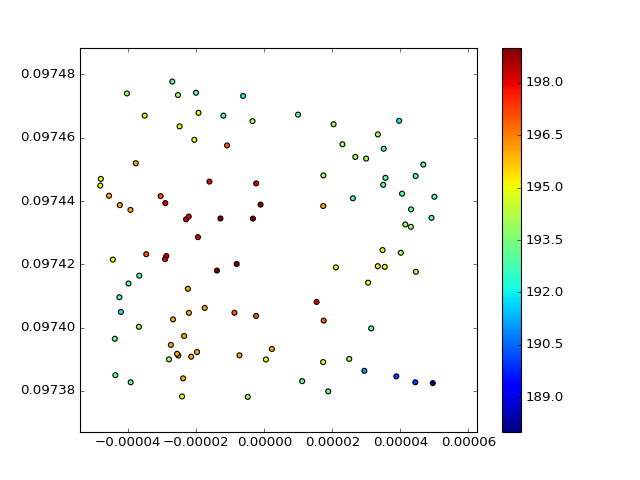

In [43]:
plt.scatter(tp[:,0],tp[:,1],c=b.sum(axis=0))
plt.colorbar()
plt.show()

In [11]:
reload(G)
SimData1=SimImage(720,1)

d1=np.array([0.005,0,0])
d2=np.array([0.005,0.005,0])
d3=np.array([0,0.005,0])

tP0,tG0=G.GetProjectedVertex(Det1,sample,orien,etalimit,grainpos,getPeaksInfo=False,bIdx=False,**exp)
tP1,tG1=G.GetProjectedVertex(Det1,sample,orien,etalimit,grainpos+d1,getPeaksInfo=False,bIdx=False,**exp)
tP2,tG2=G.GetProjectedVertex(Det1,sample,orien,etalimit,grainpos+d2,getPeaksInfo=False,bIdx=False,**exp)
tP3,tG3=G.GetProjectedVertex(Det1,sample,orien,etalimit,grainpos+d3,getPeaksInfo=False,bIdx=False,**exp)



for ii in range(len(tP0)):
    xy=np.stack((tP0[ii],tP1[ii],tP2[ii],tP3[ii]))[:,:2]
    omega=int((tP0[ii][2]+90)*4)
    SimData1.AddHit(G.digitize(xy),omega,0)

<IPython.core.display.Javascript object>


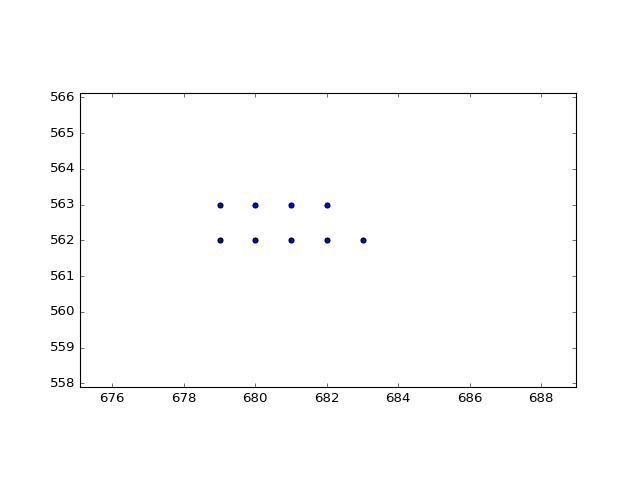

In [61]:
ii=1
points=np.array(list(SimData1.images[ii][0]))
if len(points)>0:
    plt.scatter(2047-points[:,0],2047-points[:,1])
    plt.axis('scaled')
    plt.xlim((0,2048))
    plt.ylim((0,2048))

    plt.show()

-88.0725453413
7


<IPython.core.display.Javascript object>


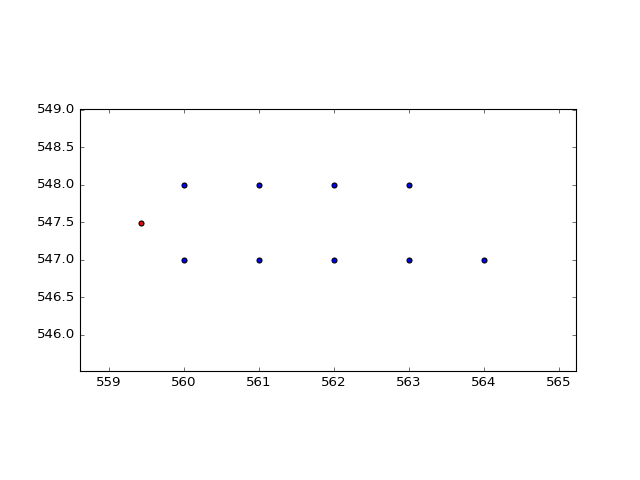

In [66]:
ii=34
print tP2[ii][2]
print int((tP0[ii][2]+90)*4)
b=np.array(list(SimData1.images[int((tP0[ii][2]+90)*4)][0]))
plt.scatter(2047-b[:,0],2047-b[:,1],c='b')


plt.scatter(2047-tP0[ii][0],2047-tP0[ii][1],c='r')

plt.axis('scaled')
plt.xlim((0,2048))
plt.ylim((0,2048))
plt.show()